## Análise Estratégica de Campanhas Publicitárias no Facebook

- O projeto foca na análise de campanhas de anúncios no Facebook para determinar os melhores segmentos de clientes. Nesta análise foi explorado dados demográficos, comportamentais e de engajamento para identificar padrões e insights que possam orientar a otimização das campanhas. Com base nessa análise, irei sugerir ações estratégicas para aprimorar a segmentação e o direcionamento dos anúncios, visando resultados mais eficientes e eficazes.

In [6]:
# bibliotecas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Fases do Projeto

- **Conhecendo o Dataset:** Importação das bibliotecas necessárias e leitura do conjunto de dados.
- **Análises Preliminares:** Exploração inicial dos dados, com o objetivo de responder perguntas e obter insights importantes.
- **Visualização dos Dados:** Utilização de gráficos e histograma para entender a distribuição dos dados e identificar possíveis outliers. Também plotagem de gráficos de dispersão para observar as relações entre as variáveis.s.

### Coleta dos dados

Arquivo: www.kaggle.com/loveall/clicks-conversion-tracking

Os dados utilizados neste projeto provêm de uma campanha publicitária nas redes sociais de uma organização anônima. O dataset conversion_data.csv contém 1143 observações em 11 variáveis. Seguem-se as descrições das variáveis.

- **Conjunto de dados:**

- **ad_id:** um ID único para cada anúncio.
- **xyz_campaign_id:** um ID associado a cada campanha de anúncios da empresa XYZ.
- **fb_campaign_id:** um ID associado ao rastreamento de cada campanha pelo Facebook.
- **age:** idade da pessoa a quem o anúncio é exibido.
- **gender:** gênero da pessoa a quem o anúncio é exibido.
- **interest:** um código especificando a categoria à qual pertence o interesse da pessoa (interesses mencionados no perfil público do Facebook da pessoa).
- **Impressions:** o número de vezes que o anúncio foi exibido.
- **Clicks:** número de cliques no anúncio.
- **Spent:** valor pago pela empresa XYZ ao Facebook para exibir o anúncio.
- **Total conversion:** número total de pessoas que se informaram sobre o produto após verem o anúncio.
- **Approved conversion:** número total de pessoas que compraram o produto após verem o anúncio.

In [19]:
# lendo o dataset
df = pd.read_csv('dataset/conversion_data.csv')

### Explorando os dados e Limpeza dos dados

In [22]:
# obtém a dimensão do dataframe
df.shape

(1143, 11)

In [24]:
# exibe as primeiras linhas do dataframe
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [26]:
# retorna as últimas linhas do dataframe df.
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [27]:
# converte os nomes das colunas do dataframe df em uma lista
df.columns.to_list()

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'age',
 'gender',
 'interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

In [29]:
df.rename(columns={
    'ad_id': 'id_anuncio',
    'xyz_campaign_id': 'id_campanha_xyz',
    'fb_campaign_id': 'id_campanha_fb',
    'age': 'idade',
    'gender': 'genero',
    'interest': 'interesse',
    'Impressions': 'impressoes',
    'Clicks': 'cliques',
    'Spent': 'gastos',
    'Total_Conversion': 'conversao_total',
    'Approved_Conversion': 'conversao_aprovada'
}, inplace=True)

In [32]:
df.columns.to_list()

['id_anuncio',
 'id_campanha_xyz',
 'id_campanha_fb',
 'idade',
 'genero',
 'interesse',
 'impressoes',
 'cliques',
 'gastos',
 'conversao_total',
 'conversao_aprovada']

In [34]:
df.rename(columns={
    'id_campanha_xyz': 'xyzCampId',
    'id_campanha_fb': 'fbCampId',
    'conversao_total': 'Conv',
    'conversao_aprovada': 'ConvAp'
}, inplace=True)

# substituindo 'id' na coluna 'xyzCampId'
df['xyzCampId'] = df['xyzCampId'].replace({916: 'campA', 936: 'campB', 1178: 'campC'})

# exibindo os 'id' na coluna 'xyzCampId' após substituição
print(df['xyzCampId'].unique())

['campA' 'campB' 'campC']


Do autor:
- Substituição realizada para facilitar o trabalha durante a análise.

In [37]:
df.head()

,id_anuncio,xyzCampId,fbCampId,idade,genero,interesse,impressoes,cliques,gastos,Conv,ConvAp
0,708746,campA,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campA,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campA,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campA,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campA,103928,30-34,M,28,4133,1,1.29,1,1


In [39]:
# informações resumidas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_anuncio  1143 non-null   int64  
 1   xyzCampId   1143 non-null   object 
 2   fbCampId    1143 non-null   int64  
 3   idade       1143 non-null   object 
 4   genero      1143 non-null   object 
 5   interesse   1143 non-null   int64  
 6   impressoes  1143 non-null   int64  
 7   cliques     1143 non-null   int64  
 8   gastos      1143 non-null   float64
 9   Conv        1143 non-null   int64  
 10  ConvAp      1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


In [41]:
# valores duplicados
df.duplicated().sum()

0

Do autor:

- Zero valores duplicados.

In [44]:
# contagem de valores ausentes 'NaN'
df.isna().sum()

id_anuncio    0
xyzCampId     0
fbCampId      0
idade         0
genero        0
interesse     0
impressoes    0
cliques       0
gastos        0
Conv          0
ConvAp        0
dtype: int64

Do autor:

- Zero valores ausentes.

In [47]:
# estatísticas descritivas para colunas numéricas do dataframe df
df.describe()

,id_anuncio,fbCampId,interesse,impressoes,cliques,gastos,Conv,ConvAp
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Do autor:
- Podemos observar uma grande variação nas impressões, com o desvio padrão sendo 312.762, indicando que alguns anúncios recebem muito mais exposição do que outros.

### Análise e visualização

In [51]:
# removi o 'id_anuncio', 'fbCampId e 'interesse', 
# pois os números desses campos são arbitrários para a correlação.
df1 = pd.get_dummies(df, columns = ['xyzCampId', 'idade', 'genero'])

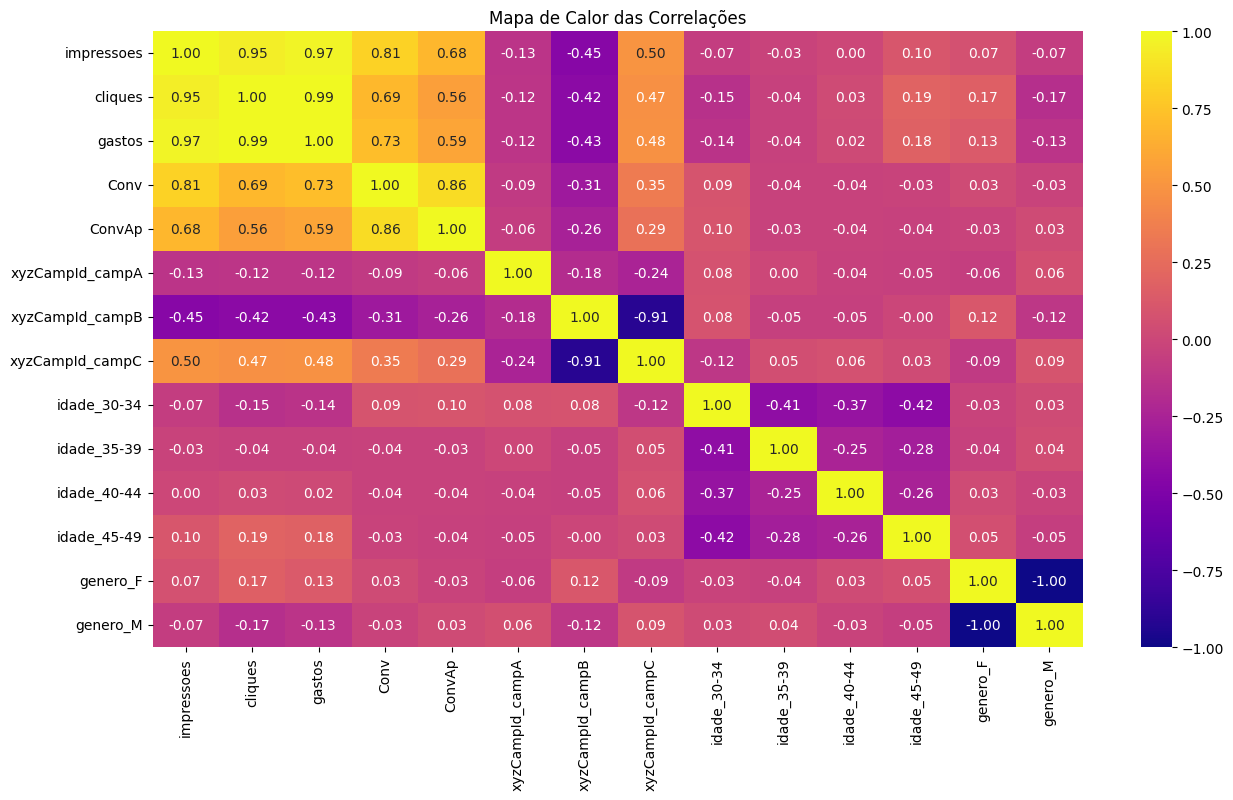

In [53]:
# Ajusta o gráfico de calor para exibir a matriz de correlação
plt.figure(figsize=(15,8))  # Define o tamanho da figura do gráfico

# Calcula a matriz de correlação para as colunas do DataFrame excluindo 'id_anuncio', 'fbCampId', e 'interesse'
# e cria um gráfico de calor (heatmap) para visualizar as correlações
sns.heatmap(df1[df1.columns.difference(['id_anuncio', 'fbCampId', 'interesse'], sort=False)].corr(), 
            annot=True,  # Adiciona os valores das correlações no gráfico
            fmt=".2f",  # Formata os valores das correlações com duas casas decimais
            cmap="plasma")  # Define o mapa de cores como 'plasma'

plt.title("Mapa de Calor das Correlações")  # Define o título do gráfico
plt.show()  # Exibe o gráfico

Do autor:

- **Grupo Etário 30-34 anos:** Tanto as conversões totais quanto as aprovadas apresentam uma forte correlação positiva com o grupo etário de 30-34 anos. Este grupo demonstrou uma tendência acentuada a solicitar informações e efetuar compras, em comparação com outros grupos etários.

- **Cliques por Grupo Etário:** Os cliques estão mais associados aos grupos etários de 40-44 e 45-49. Isto sugere que clientes mais velhos têm uma maior propensão a clicar nos anúncios. No entanto, quando analisamos as conversões para esses grupos etários, a correlação é negativa, indicando uma taxa de conversão menor em comparação com os grupos mais jovens

- **Diferenças de Gênero:** Mulheres são mais propensas a clicar nos anúncios e a solicitar informações sobre o produto. Contudo, após a solicitação, os homens tendem a realizar mais compras.

- **Campanhas Publicitárias:** As Campanhas A e B foram mais direcionadas a clientes jovens, evidenciado pela correlação positiva com o grupo etário de 30-34 anos. Em contraste, a Campanha C focou em clientes mais velhos, como indicado pela correlação negativa com o grupo etário de 30-34 anos.

- **Correlação com Variáveis Não Demográficas:** Variáveis não demográficas são influenciadas pela discrepância significativa entre o número de impressões e o número efetivo de anúncios.

### Análise Detalhada da Campanha

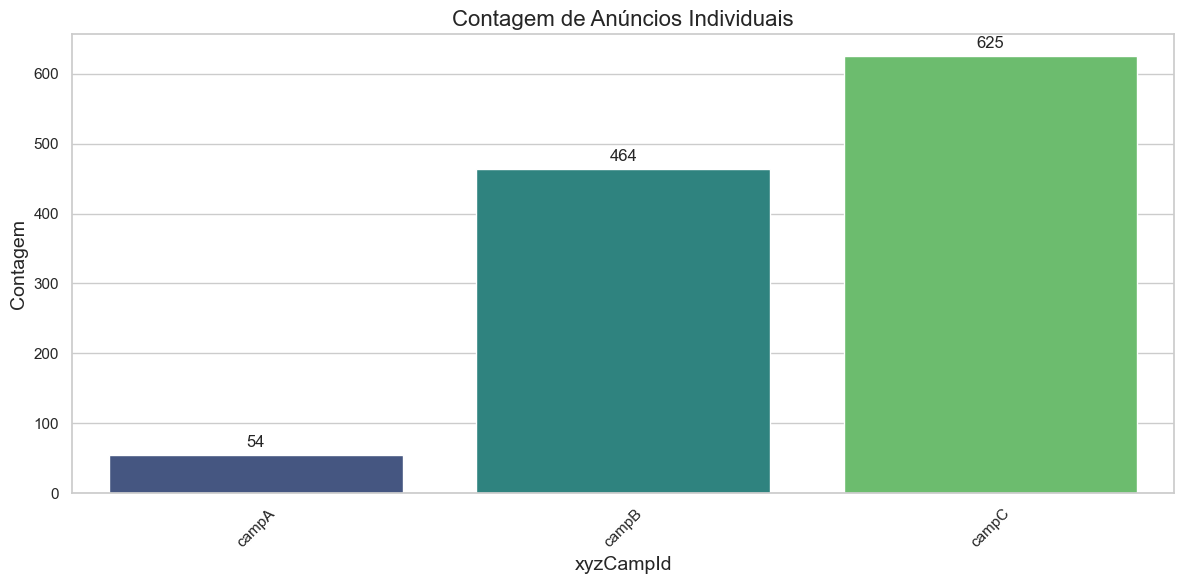

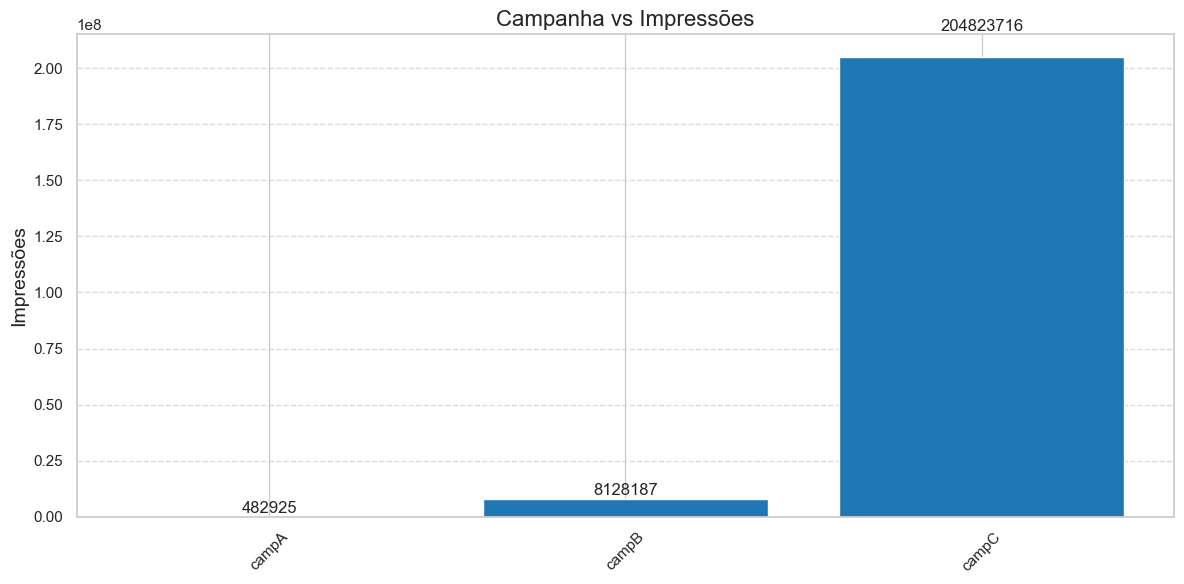

In [56]:
# Define o estilo dos gráficos
sns.set(style="whitegrid")

# Criação do Gráfico de Contagem
plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico
count_plot = sns.countplot(x='xyzCampId', data=df, hue='xyzCampId', palette='viridis', legend=False)  
# Cria um gráfico de contagem usando seaborn, colorido com o esquema 'viridis' e sem legenda
count_plot.set_title('Contagem de Anúncios Individuais', fontsize=16)  # Define o título do gráfico
count_plot.set_xlabel('xyzCampId', fontsize=14)  # Define o rótulo do eixo x
count_plot.set_ylabel('Contagem', fontsize=14)  # Define o rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus

# Adiciona anotações com o valor das contagens
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),  # Formata o valor da contagem como um número inteiro
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação (no topo da barra)
                        ha='center', va='center',  # Alinha horizontal e verticalmente o texto
                        xytext=(0, 9),  # Desloca a anotação 9 pontos acima da barra
                        textcoords='offset points',  # Usa pontos de deslocamento para a anotação
                        fontsize=12)  # Define o tamanho da fonte da anotação

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()  # Exibe o gráfico

# Calcula a soma das impressões por campanha
campSum = df.groupby(by=['xyzCampId']).sum()

# Criação do Gráfico de Barras para Impressões
plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico
bar_plot = plt.bar(campSum.index, campSum['impressoes'], color='#1f77b4')  
# Cria um gráfico de barras com a cor azul e os índices das campanhas no eixo x
plt.ylabel("Impressões", fontsize=14)  # Define o rótulo do eixo y
plt.title("Campanha vs Impressões", fontsize=16)  # Define o título do gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus

# Adiciona rótulos de valor nas barras
for bar in bar_plot:
    yval = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval,  # Define a posição do texto (um pouco acima da barra)
             format(yval, '.0f'), ha='center', va='bottom', fontsize=12)  # Adiciona o texto com o valor formatado

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade horizontal com linhas tracejadas e transparência
plt.show()  # Exibe o gráfico

Do autor:

- Devido à distribuição desigual tanto dos anúncios individuais quanto das impressões de cada campanha, é necessário incluir indicadores-chave de desempenho adicionais, como a taxa de cliques (CTR), o custo por clique (CPC), a taxa de conversão e o custo de aquisição de clientes (CAC).

- Assume-se que o CAC considera que cada link de anúncio direciona para a mesma página de destino e, portanto, os clientes têm a mesma experiência de compra.

- Além disso, poderíamos utilizar o retorno sobre o gasto com publicidade (ROAS) para obter uma análise mais abrangente. No entanto, devido à falta de informações sobre o valor dos clientes e o custo do produto envolvido no anúncio, assumiremos que a empresa está promovendo widgets com o mesmo preço em todas as campanhas, e que diferentes grupos demográficos de clientes (como mulheres, na faixa etária de 30 a 34 anos) possuem o mesmo valor de vida útil do cliente. Embora essa abordagem não seja ideal, permitirá uma análise mais simplificada.

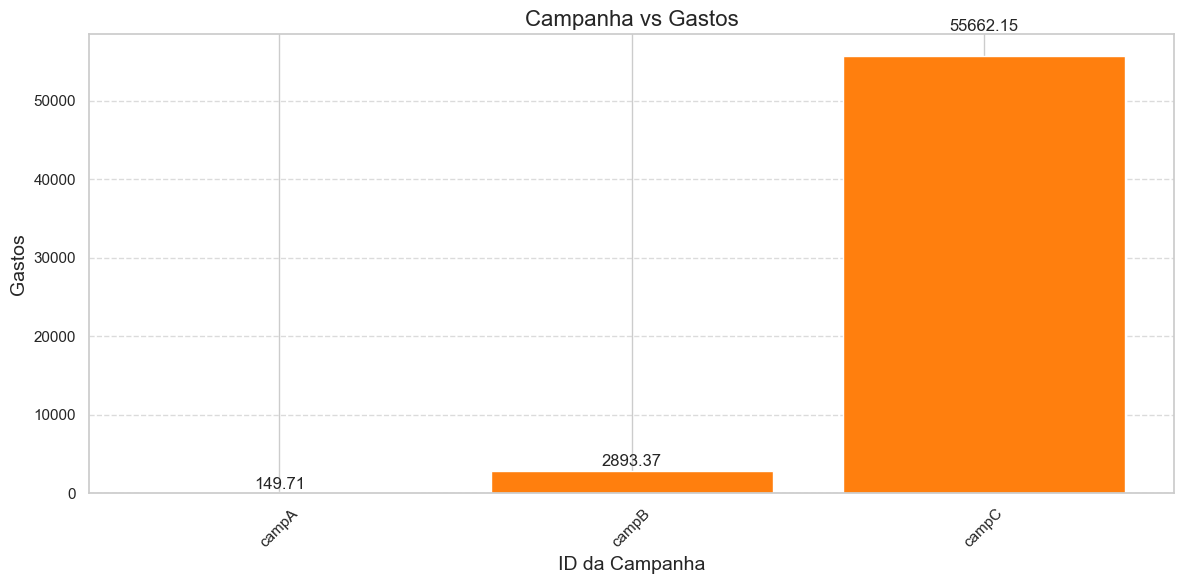

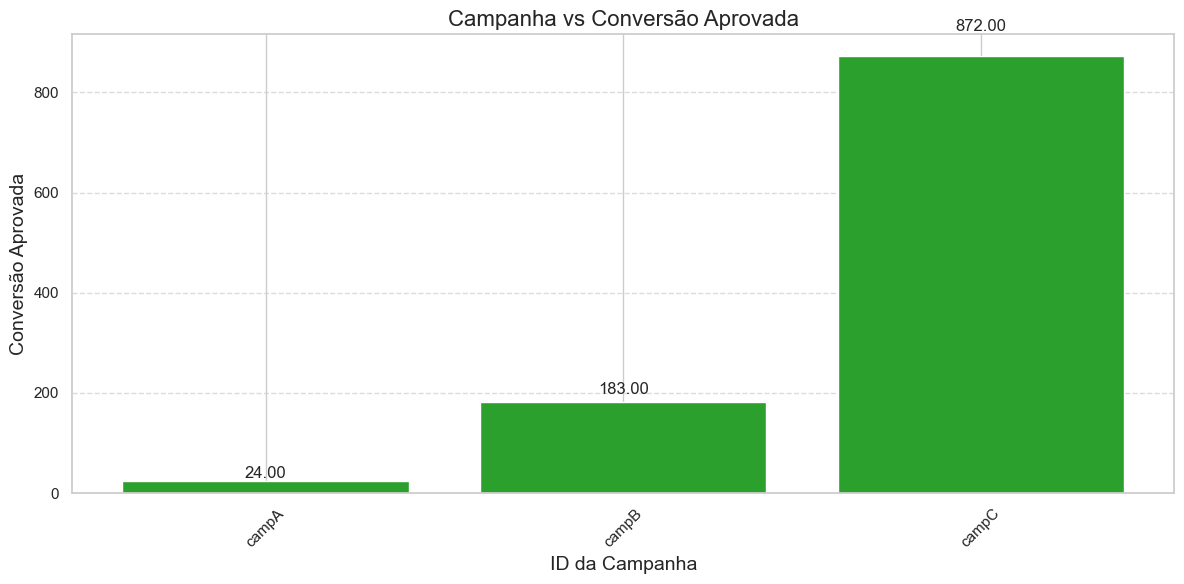

In [58]:
import matplotlib.pyplot as plt

# Calcula a soma dos gastos por campanha
campSum = df.groupby(by=['xyzCampId']).sum()

# Cria o gráfico de barras para visualizar os gastos por campanha
plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico
gastos_plot = plt.bar(campSum.index, campSum["gastos"], color='#ff7f0e')  # Cria o gráfico de barras com a cor laranja
plt.ylabel("Gastos", fontsize=14)  # Define o rótulo do eixo y como "Gastos"
plt.title("Campanha vs Gastos", fontsize=16)  # Define o título do gráfico como "Campanha vs Gastos"
plt.xlabel("ID da Campanha", fontsize=14)  # Define o rótulo do eixo x como "ID da Campanha"
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus

# Adiciona rótulos de valor nas barras
for bar in gastos_plot:
    yval = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval,  # Define a posição do texto (um pouco acima da barra)
             format(yval, '.2f'), ha='center', va='bottom', fontsize=12)  # Adiciona o texto com o valor formatado

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade horizontal com linhas tracejadas e transparência
plt.show()  # Exibe o gráfico

# Calcula a soma das conversões aprovadas por campanha
campSum = df.groupby(by=['xyzCampId']).sum()

# Cria o gráfico de barras para visualizar as conversões aprovadas por campanha
plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico
conv_ap_plot = plt.bar(campSum.index, campSum["ConvAp"], color='#2ca02c')  # Cria o gráfico de barras com a cor verde
plt.ylabel("Conversão Aprovada", fontsize=14)  # Define o rótulo do eixo y como "Conversão Aprovada"
plt.title("Campanha vs Conversão Aprovada", fontsize=16)  # Define o título do gráfico como "Campanha vs Conversão Aprovada"
plt.xlabel("ID da Campanha", fontsize=14)  # Define o rótulo do eixo x como "ID da Campanha"
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus

# Adiciona rótulos de valor nas barras
for bar in conv_ap_plot:
    yval = bar.get_height()  # Obtém a altura da barra
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05 * yval,  # Define a posição do texto (um pouco acima da barra)
             format(yval, '.2f'), ha='center', va='bottom', fontsize=12)  # Adiciona o texto com o valor formatado

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade horizontal com linhas tracejadas e transparência
plt.show()  # Exibe o gráfico

Do autor:
- Sem surpresas aqui, a Campanha C apresenta o maior gasto com anúncios e o maior número de conversões, o que está em linha com suas altas impressões mostradas no gráfico anterior

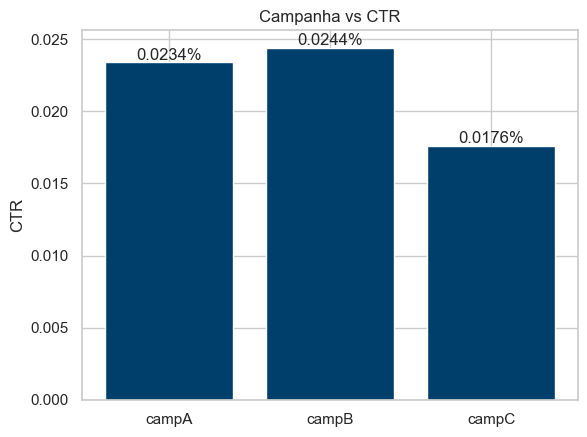

In [60]:
# Calcula a Taxa de Clique (CTR) para uma campanha publicitária
# A CTR é calculada como a razão entre o número de cliques e o número de impressões, multiplicada por 100 para obter a porcentagem.
campCTR = campSum['cliques'] / campSum['impressoes'] * 100

# Cria um gráfico de barras para visualizar a CTR por campanha
plt.bar(campCTR.index, campCTR, color='#003f6c')  # Define a cor das barras como azul escuro
plt.ylabel("CTR")  # Define o rótulo do eixo y como "CTR"
plt.title("Campanha vs CTR")  # Define o título do gráfico como "Campanha vs CTR"

# Adiciona anotações com os valores percentuais sobre cada barra
for x, y in zip(campCTR.index, campCTR):
    label = "{:.4f}%".format(y)  # Formata o valor da CTR como porcentagem com quatro casas decimais
    
    plt.annotate(label,  # Anota o gráfico com o valor formatado
                 (x, y),  # Posição da anotação (no topo da barra)
                 textcoords="offset points",  # Usar pontos de deslocamento para a anotação
                 xytext=(0, 2),  # Desloca a anotação 2 pontos acima da barra
                 ha='center')  # Alinha horizontalmente o texto ao centro

# Exibe o gráfico
plt.show()

Do autor:
- Aqui observamos que tanto a Campanha A quanto a Campanha B apresentam taxas de cliques (CTR) mais altas, indicando que elas possuem uma mensagem mais eficaz ou um melhor direcionamento do que a Campanha C. Vamos investigar isso mais a fundo.

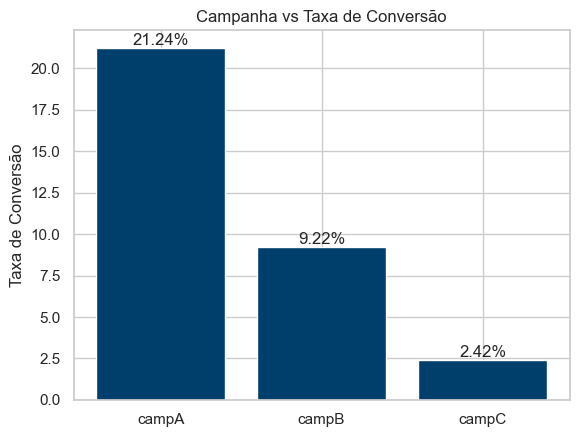

In [63]:
# Calcula a Taxa de Conversão (Conversion Rate) para uma campanha publicitária
# A Taxa de Conversão é calculada como a razão entre o número de conversões e o número de cliques,
# multiplicada por 100 para obter a porcentagem.
campConv = campSum['ConvAp'] / campSum['cliques'] * 100

# Cria um gráfico de barras para visualizar a Taxa de Conversão por campanha
plt.bar(campConv.index, campConv, color='#003f6c')  # Define a cor das barras como azul marinho
plt.ylabel("Taxa de Conversão")  # Define o rótulo do eixo y como "Taxa de Conversão"
plt.title("Campanha vs Taxa de Conversão")  # Define o título do gráfico como "Campanha vs Taxa de Conversão"

# Adiciona anotações com os valores percentuais sobre cada barra
for x, y in zip(campConv.index, campConv):
    label = "{:.2f}%".format(y)  # Formata o valor da Taxa de Conversão como porcentagem com duas casas decimais
    
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Posição da anotação (no topo da barra)
                 textcoords="offset points",  # Define a forma de posicionar o texto
                 xytext=(0, 2),  # Desloca a anotação 2 pontos acima da barra
                 ha='center')  # Alinha horizontalmente o texto ao centro

# Exibe o gráfico
plt.show()

Do autor:
- As Campanhas A e B têm taxas de conversão muito maiores do que a Campanha C. No entanto, ao analisar a taxa de conversão total da empresa, observamos apenas 2,83%, devido à grande proporção de conversões aprovadas que a Campanha C representa em comparação com as demais

In [65]:
# taxa geral de conversão
overallConvRate = round(df['ConvAp'].sum()/df['cliques'].sum()*100, 2)
print(overallConvRate)

2.83


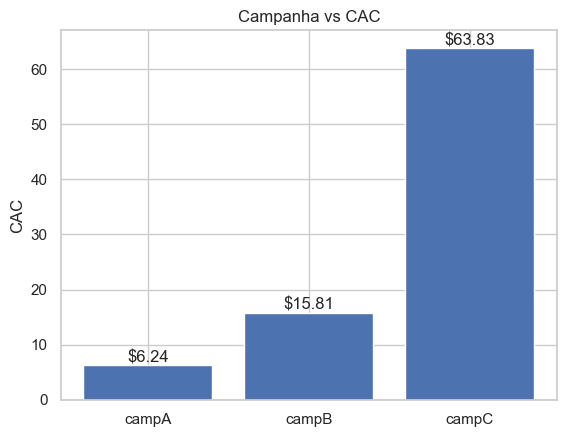

In [66]:
# Calcula o CAC (Custo de Aquisição de Cliente) dividindo os gastos pela quantidade de campanhas
campCAC = campSum['gastos'] / campSum['ConvAp']

# Cria o gráfico de barras
plt.bar(campCAC.index, campCAC)

# Adiciona o rótulo no eixo y
plt.ylabel("CAC")

# Adiciona o título ao gráfico
plt.title("Campanha vs CAC")

# Adiciona anotações em cada barra do gráfico com o valor do CAC formatado
for x, y in zip(campCAC.index, campCAC):
    # Formata o valor do CAC para exibir como moeda
    label = "${:.2f}".format(y)

    # Adiciona a anotação ao gráfico
    plt.annotate(label, # este é o texto da anotação
                 (x, y), # este é o ponto a ser rotulado
                 textcoords="offset points", # como posicionar o texto
                 xytext=(0, 2), # distância do texto para os pontos (x, y)
                 ha='center') # alinhamento horizontal pode ser left, right ou center

# Exibe o gráfico
plt.show()

Do autor:
- A Campanha C tem um Custo de Aquisição de Cliente (CAC) mais de quatro vezes superior ao da Campanha B. Além disso, sua CTR mais baixa sugere que a mensagem não está atraindo bem os clientes. Isso, combinado com o CAC elevado, indica que os clientes que clicam no anúncio podem não estar interessados no produto. Vamos verificar se o custo por clique da Campanha C é mais alto em comparação com as outras campanhas.

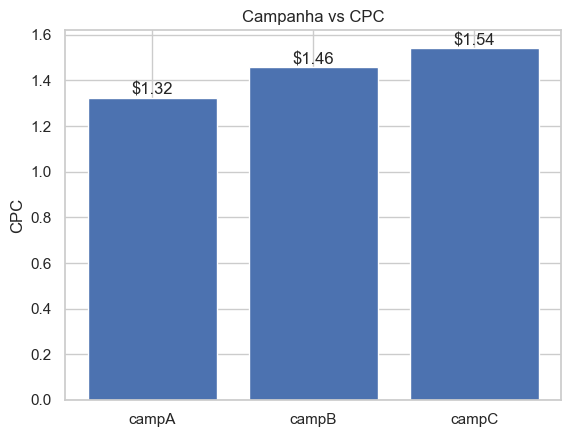

In [68]:
# Calcula o CPC (Custo por Clique) dividindo os gastos pelo número de cliques
campCPC = campSum['gastos'] / campSum['cliques']

# Cria o gráfico de barras
plt.bar(campCPC.index, campCPC)

# Adiciona o rótulo no eixo y
plt.ylabel("CPC")

# Adiciona o título ao gráfico
plt.title("Campanha vs CPC")

# Adiciona anotações em cada barra do gráfico com o valor do CPC formatado
for x, y in zip(campCPC.index, campCPC):
    # Formata o valor do CPC para exibir como moeda
    label = "${:.2f}".format(y)

    # Adiciona a anotação ao gráfico
    plt.annotate(label, # este é o texto da anotação
                 (x, y), # este é o ponto a ser rotulado
                 textcoords="offset points", # como posicionar o texto
                 xytext=(0, 2), # distância do texto para os pontos (x, y)
                 ha='center') # alinhamento horizontal pode ser left, right ou center

# Exibe o gráfico
plt.show()

Do autor:
- O Custo por Clique (CPC) da Campanha C é o mais alto, no entanto, essa diferença não justifica o CAC muito maior que a Campanha C apresenta.

#### Gênero

In [72]:
# Agrupa o DataFrame 'df' pelo gênero e calcula a soma dos valores para cada grupo
genSum = df.groupby(by=['genero']).sum()

# Calcula o total de impressões somando todas as impressões do DataFrame
total_impressions = df['impressoes'].sum()

# Remove as colunas 'id_anuncio' e 'fbCampId' do DataFrame 'genSum' pois não são relevantes para esta parte da análise
genSum.drop(['id_anuncio', 'fbCampId'], axis=1, inplace=True)

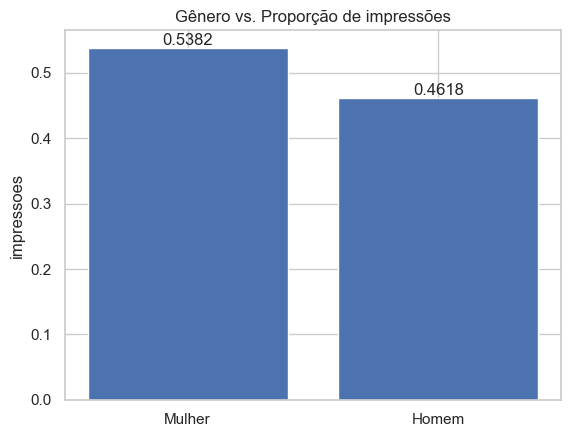

In [73]:
# Calcula a proporção de impressões por gênero
gen_impression_prop = {'Mulher': genSum['impressoes']['F']/total_impressions, 'Homem': genSum['impressoes']['M']/total_impressions}

# Cria um gráfico de barras para a proporção de impressões por gênero
plt.bar(gen_impression_prop.keys(), gen_impression_prop.values())

# Adiciona rótulo no eixo y
plt.ylabel("impressoes")

# Adiciona título ao gráfico
plt.title("Gênero vs. Proporção de impressões")

# Adiciona anotações com as proporções em cada barra do gráfico
for x, y in zip(gen_impression_prop.keys(), gen_impression_prop.values()):
    label = "{:.4f}".format(y)  # Formata a proporção com 4 casas decimais
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Ponto para posicionar a anotação
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),  # Distância do texto em relação ao ponto (x, y)
                 ha='center')  # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Podemos notar que, entre as pessoas que visualizaram o anúncio em todas as campanhas, 54% eram mulheres e 46% eram homens.

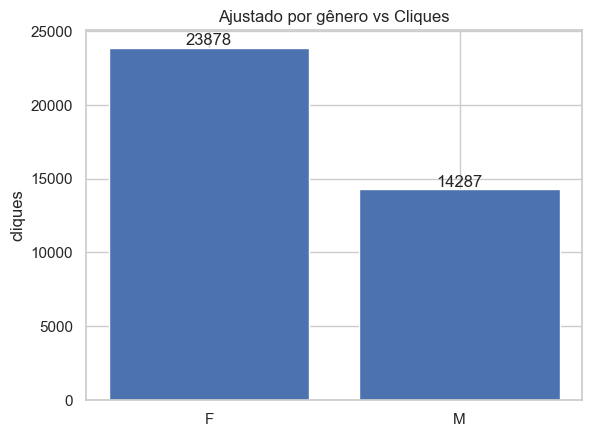

In [76]:
# Cria um gráfico de barras para o número de cliques ajustado por gênero
plt.bar(genSum.index, genSum['cliques'])

# Adiciona rótulo no eixo y
plt.ylabel("cliques")

# Adiciona título ao gráfico
plt.title("Ajustado por gênero vs Cliques")

# Adiciona anotações com o número de cliques em cada barra do gráfico
for x, y in zip(genSum.index, genSum['cliques']):
    label = "{:.0f}".format(y)  # Formata o número de cliques como um inteiro
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Ponto para posicionar a anotação
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),  # Distância do texto em relação ao ponto (x, y)
                 ha='center')  # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

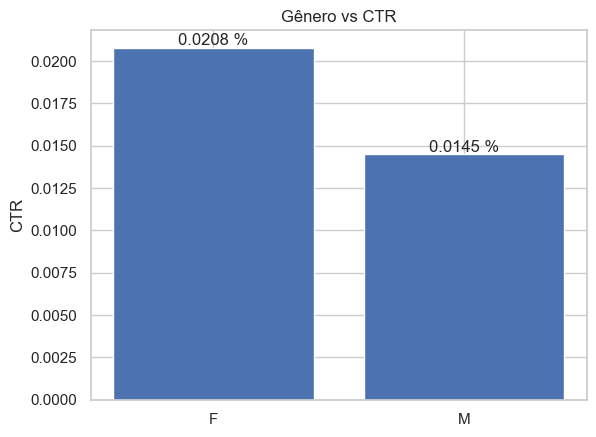

In [77]:
genCTR = genSum['cliques']/genSum['impressoes']*100
plt.bar(genCTR.index, genCTR)
plt.ylabel("CTR")
plt.title("Gênero vs CTR")
for x,y in zip(genCTR.index, genCTR):

    label = "{:.4f} %".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

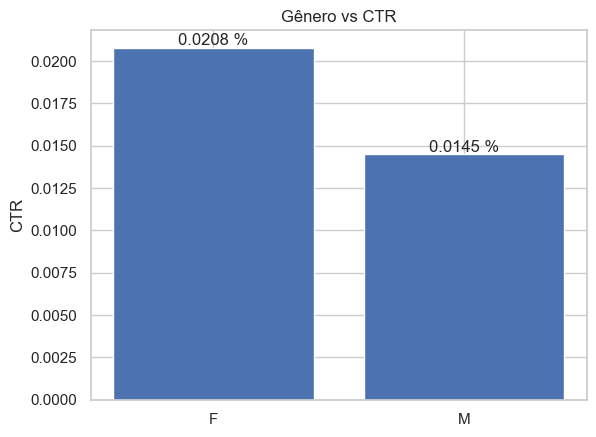

In [79]:
# Calcula a taxa de cliques (CTR) como uma porcentagem
genCTR = genSum['cliques'] / genSum['impressoes'] * 100

# Cria um gráfico de barras para a taxa de cliques (CTR) por gênero
plt.bar(genCTR.index, genCTR)

# Adiciona rótulo no eixo y
plt.ylabel("CTR")

# Adiciona título ao gráfico
plt.title("Gênero vs CTR")

# Adiciona anotações com a CTR em cada barra do gráfico
for x, y in zip(genCTR.index, genCTR):
    label = "{:.4f} %".format(y)  # Formata a CTR com 4 casas decimais e adiciona o símbolo de porcentagem
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Ponto para posicionar a anotação
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),  # Distância do texto em relação ao ponto (x, y)
                 ha='center')  # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- As mulheres têm uma taxa de cliques (CTR) superior à dos homens.

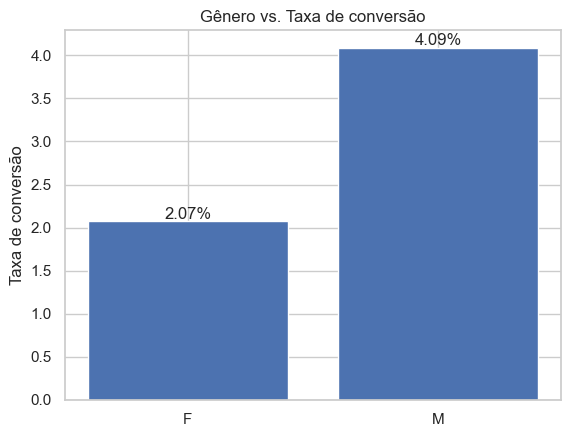

In [81]:
# Calcula a taxa de conversão como uma porcentagem
genConvRate = genSum['ConvAp'] / genSum['cliques'] * 100

# Cria um gráfico de barras para a taxa de conversão por gênero
plt.bar(genConvRate.index, genConvRate)

# Adiciona rótulo no eixo y
plt.ylabel("Taxa de conversão")

# Adiciona título ao gráfico
plt.title("Gênero vs. Taxa de conversão")

# Adiciona anotações com a taxa de conversão em cada barra do gráfico
for x, y in zip(genConvRate.index, genConvRate):
    label = "{:.2f}%".format(y)  # Formata a taxa de conversão com 2 casas decimais e adiciona o símbolo de porcentagem
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Ponto para posicionar a anotação
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),  # Distância do texto em relação ao ponto (x, y)
                 ha='center')  # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Embora as mulheres tenham uma taxa de cliques (CTR) mais alta, os homens têm quase o dobro de probabilidade de concluir uma compra após acessar o site.

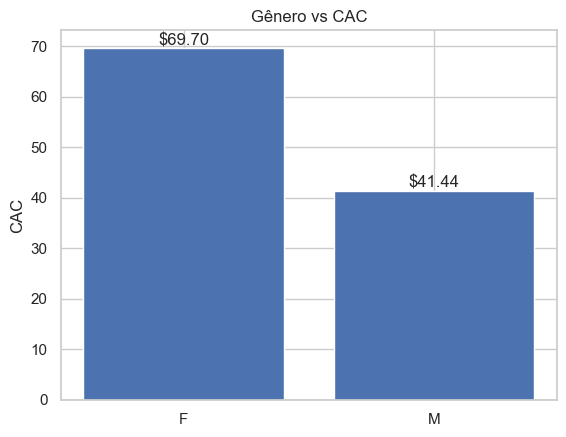

In [85]:
# Calcula o Custo de Aquisição de Clientes (CAC)
genCAC = genSum['gastos'] / genSum['ConvAp']

# Cria um gráfico de barras para o CAC por gênero
plt.bar(genCAC.index, genCAC)

# Adiciona rótulo no eixo y
plt.ylabel("CAC")

# Adiciona título ao gráfico
plt.title("Gênero vs CAC")

# Adiciona anotações com o valor do CAC em cada barra do gráfico
for x, y in zip(genCAC.index, genCAC):
    label = "${:.2f}".format(y)  # Formata o CAC com 2 casas decimais e adiciona o símbolo de dólar
    plt.annotate(label,  # Texto da anotação
                 (x, y),  # Ponto para posicionar a anotação
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),  # Distância do texto em relação ao ponto (x, y)
                 ha='center')  # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Assim, devido ao CTR e à taxa de conversão, o CAC dos homens é apenas 2/3 do das mulheres.

#### Gênero por campanha

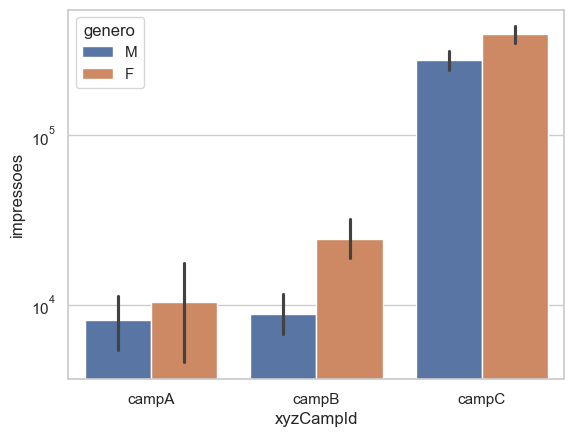

In [90]:
# Define o estilo do gráfico para "whitegrid" usando seaborn
sns.set(style="whitegrid")

# Carrega o conjunto de dados "tips" do seaborn
tips = sns.load_dataset("tips")

# Cria um gráfico de barras com base no DataFrame 'tips'
g = sns.barplot(x=df["xyzCampId"], y=df["impressoes"], hue=df["genero"], data=tips)

# Define a escala do eixo y para logarítmica
g.set_yscale('log')

Do autor:
- Em todas as campanhas, as mulheres estão mais expostas aos anúncios.

<Axes: xlabel='xyzCampId', ylabel='None'>

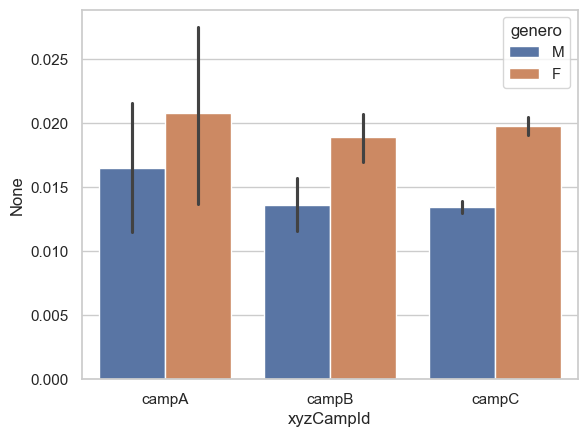

In [93]:
# Define o estilo do gráfico para "whitegrid" usando seaborn
sns.set(style="whitegrid")

# Carrega o conjunto de dados "tips" do seaborn
tips = sns.load_dataset("tips")

# Cria um gráfico de barras com base no DataFrame 'tips'
# hue: Gênero (substitua 'df["genero"]' por 'tips["genero"]')
sns.barplot(x=df["xyzCampId"], y=df["cliques"]/df['impressoes']*100, hue=df["genero"], data=tips)

Do autor:
- Além disso, elas apresentam uma taxa de cliques (CTR) e um custo de aquisição de clientes (CAC) mais altos em todas as campanhas, com uma conversão mais baixa, conforme mostrado abaixo

Text(0.5, 1.0, 'Taxa de conversão por gênero')

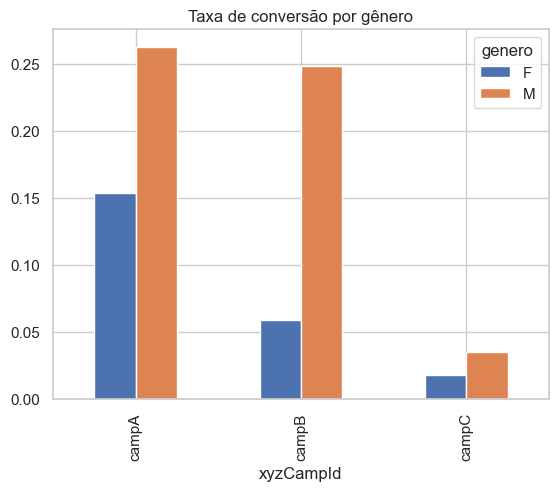

In [96]:
# Agrupa o DataFrame df por 'xyzCampId' e 'genero', somando os valores numéricos
genCampSum = df.groupby(by = ['xyzCampId', 'genero']).sum()

# Calcula a taxa de conversão como a razão entre 'ConvAp' e 'cliques'
genCampConv = genCampSum['ConvAp']/genCampSum['cliques']

# Mescla o DataFrame agrupado com a taxa de conversão calculada, renomeando a coluna para 'Taxa de conversão'
genCampSumCov = genCampSum.merge(genCampConv.rename('Taxa de conversão'), left_index=True, right_index=True)

# Plota a taxa de conversão por gênero em um gráfico de barras
genCampSumCov['Taxa de conversão'].unstack().plot(kind='bar').set_title('Taxa de conversão por gênero')

Text(0.5, 1.0, 'CAC por gênero')

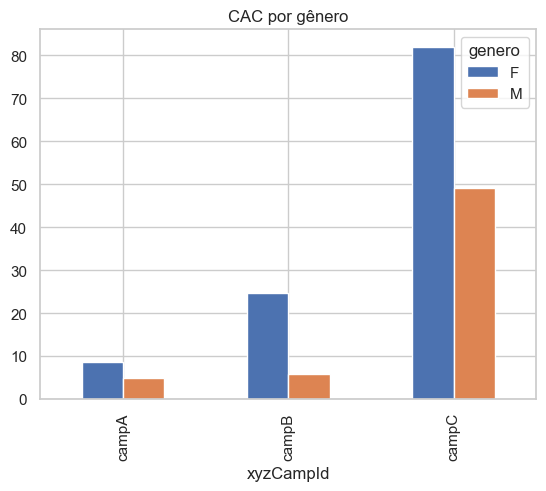

In [97]:
# Agrupa o DataFrame df por 'xyzCampId' e 'genero', somando os valores numéricos
genCampSum = df.groupby(by = ['xyzCampId', 'genero']).sum()

# Calcula o Custo de Aquisição de Cliente (CAC) como a razão entre 'gastos' e 'ConvAp'
genCampCAC = genCampSum['gastos']/genCampSum['ConvAp']

# Mescla o DataFrame agrupado com o CAC calculado, renomeando a coluna para 'CAC'
genCampSumCAC = genCampSum.merge(genCampCAC.rename('CAC'), left_index=True, right_index=True)

# Plota o CAC por gênero em um gráfico de barras
genCampSumCAC['CAC'].unstack().plot(kind='bar').set_title('CAC por gênero')

#### Idade

In [100]:
# Agrupa o DataFrame df por 'idade', somando os valores numéricos
ageSum = df.groupby(by=['idade']).sum()

# Remove as colunas 'id_anuncio' e 'fbCampId' do DataFrame, pois não são relevantes para esta parte
ageSum.drop(['id_anuncio', 'fbCampId'], axis=1, inplace=True)

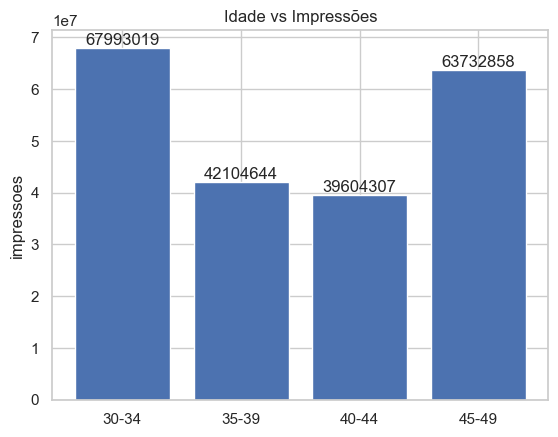

In [102]:
# Cria um gráfico de barras para 'impressoes' com base no índice 'idade'
plt.bar(ageSum.index, ageSum['impressoes'])

# Adiciona rótulo ao eixo y
plt.ylabel("impressoes")

# Define o título do gráfico
plt.title("Idade vs Impressões")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageSum.index, ageSum['impressoes']):
    label = "{:.0f}".format(y)  # Formata o valor para exibir sem casas decimais

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- A faixa etária de 30-34 anos possui o maior número de impressões, com a faixa de 45-49 anos logo atrás.

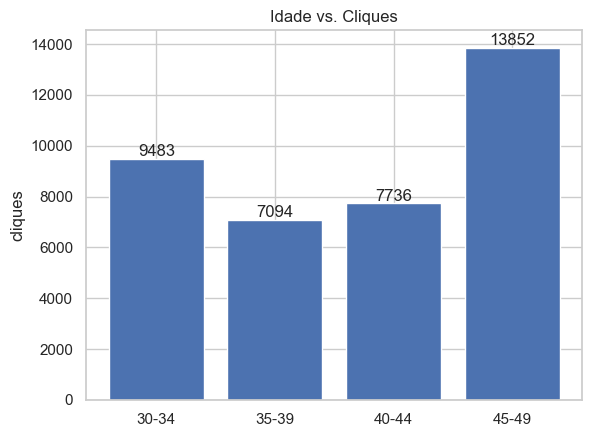

In [104]:
# Cria um gráfico de barras para 'cliques' com base no índice 'idade'
plt.bar(ageSum.index, ageSum['cliques'])

# Adiciona rótulo ao eixo y
plt.ylabel("cliques")

# Define o título do gráfico
plt.title("Idade vs. Cliques")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageSum.index, ageSum['cliques']):
    label = "{:.0f}".format(y)  # Formata o valor para exibir sem casas decimais

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Os cliques, no entanto, apresentam uma história diferente, com a faixa etária de 45-49 anos tendo, de longe, o maior número de cliques.

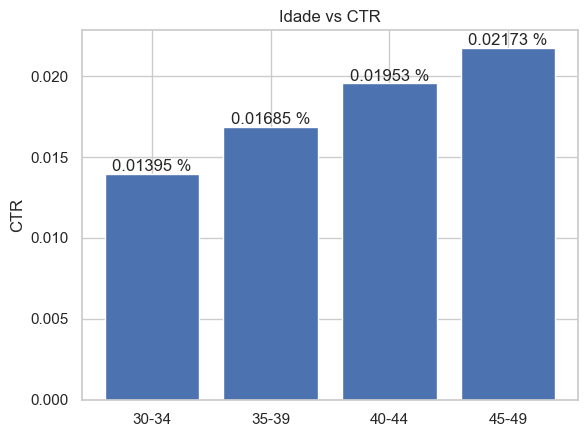

In [107]:
# Calcula a Taxa de Cliques (CTR) como a razão entre 'cliques' e 'impressoes', multiplicada por 100
ageCTR = ageSum['cliques']/ageSum['impressoes']*100

# Cria um gráfico de barras para a CTR com base no índice 'idade'
plt.bar(ageCTR.index, ageCTR)

# Adiciona rótulo ao eixo y
plt.ylabel("CTR")

# Define o título do gráfico
plt.title("Idade vs CTR")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageCTR.index, ageCTR):
    label = "{:.5f} %".format(y)  # Formata o valor da CTR para exibir com 4 casas decimais e o símbolo de porcentagem

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Portanto, a faixa etária de 45-49 anos possui a maior taxa de cliques (CTR), enquanto a faixa de 30-34 anos tem a menor.

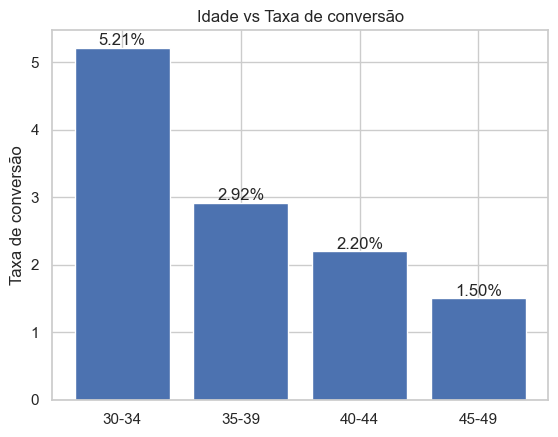

In [110]:
# Calcula a Taxa de Conversão como a razão entre 'ConvAp' e 'cliques', multiplicada por 100
ageConvRate = ageSum['ConvAp']/ageSum['cliques']*100

# Cria um gráfico de barras para a Taxa de Conversão com base no índice 'idade'
plt.bar(ageConvRate.index, ageConvRate)

# Adiciona rótulo ao eixo y
plt.ylabel("Taxa de conversão")

# Define o título do gráfico
plt.title("Idade vs Taxa de conversão")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageConvRate.index, ageConvRate):
    label = "{:.2f}%".format(y)  # Formata o valor da Taxa de Conversão para exibir com 2 casas decimais e o símbolo de porcentagem

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- No entanto, ao analisar a taxa de conversão, a faixa etária de 30-34 anos tem uma taxa de conversão quase duas vezes maior do que a de qualquer outro grupo

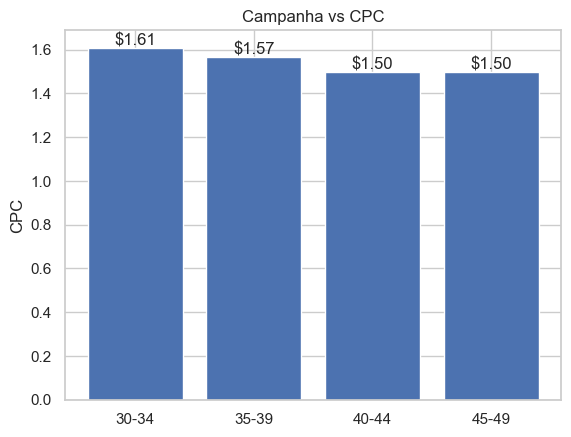

In [112]:
# Calcula o Custo Por Clique (CPC) como a razão entre 'gastos' e 'cliques'
ageCPC = ageSum['gastos']/ageSum['cliques']

# Cria um gráfico de barras para o CPC com base no índice 'idade'
plt.bar(ageCPC.index, ageCPC)

# Adiciona rótulo ao eixo y
plt.ylabel("CPC")

# Define o título do gráfico
plt.title("Campanha vs CPC")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageCPC.index, ageCPC):
    label = "${:.2f}".format(y)  # Formata o valor do CPC para exibir com 2 casas decimais e o símbolo de dólar

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- O CPC (Custo por Clique) diminui à medida que a idade aumenta

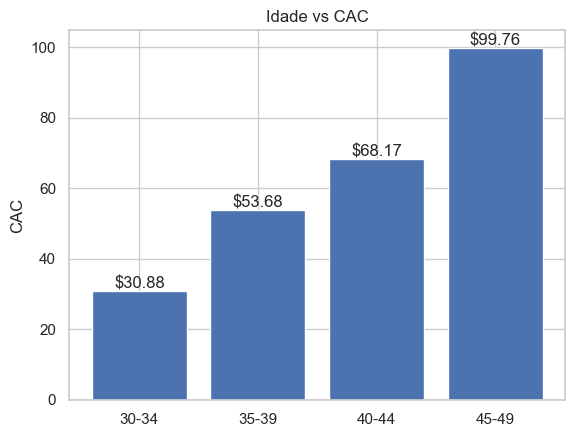

In [115]:
# Calcula o Custo de Aquisição de Cliente (CAC) como a razão entre 'gastos' e 'ConvAp'
ageCAC = ageSum['gastos']/ageSum['ConvAp']

# Cria um gráfico de barras para o CAC com base no índice 'idade'
plt.bar(ageCAC.index, ageCAC)

# Adiciona rótulo ao eixo y
plt.ylabel("CAC")

# Define o título do gráfico
plt.title("Idade vs CAC")

# Adiciona rótulos aos pontos no gráfico
for x, y in zip(ageCAC.index, ageCAC):
    label = "${:.2f}".format(y)  # Formata o valor do CAC para exibir com 2 casas decimais e o símbolo de dólar

    plt.annotate(label,            # Texto do rótulo
                 (x, y),            # Ponto para rotular
                 textcoords="offset points",  # Como posicionar o texto
                 xytext=(0, 2),     # Distância do texto em relação ao ponto
                 ha='center')      # Alinhamento horizontal do texto

# Exibe o gráfico
plt.show()

Do autor:
- Nota-se que o CTR (Taxa de Cliques) aumenta com a idade, enquanto a taxa de conversão diminui. Portanto, é coerente que o custo de aquisição de clientes seja mais alto na faixa etária de 45-49 anos, enquanto é mais baixo na faixa de 30-34 anos.

#### Campanha por Faixa Etária

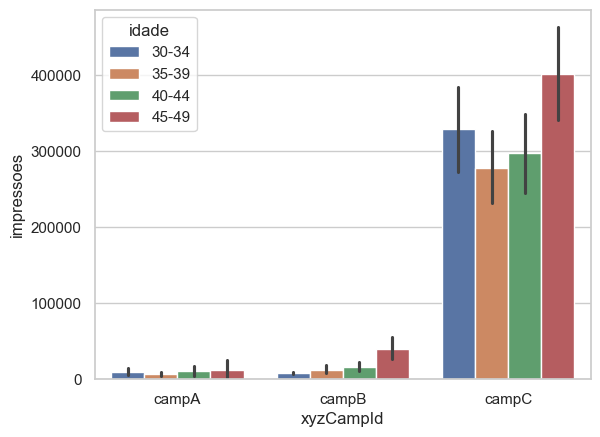

In [118]:
# Define o estilo do gráfico
sns.set(style="whitegrid")

# Carrega o conjunto de dados 'tips' (opcional se não for necessário neste contexto)
tips = sns.load_dataset("tips")

# Supondo que df seja o DataFrame que você deseja usar para o gráfico
# Cria um gráfico de barras com base em 'xyzCampId', 'impressoes' e 'idade'
g = sns.barplot(x="xyzCampId", y="impressoes", hue="idade", data=df)

# Exibe o gráfico
plt.show()

Do autor:
- A Campanha A é a mais uniformemente distribuída entre as faixas etárias, enquanto as Campanhas B e C são mais direcionadas para a faixa etária de 45-49 anos.

<Axes: xlabel='xyzCampId', ylabel='None'>

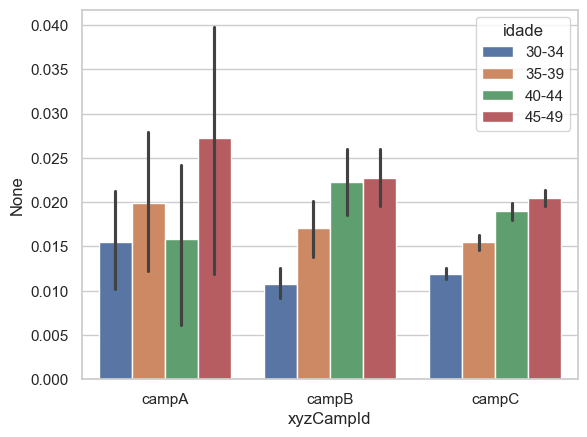

In [120]:
# Configuração do estilo do seaborn para os gráficos
sns.set(style="whitegrid")

# Carregamento do dataset "tips" do seaborn
tips = sns.load_dataset("tips")

# Criação de um gráfico de barras
# x: coluna "xyzCampId" do DataFrame df
# y: razão entre "cliques" e "impressoes" multiplicada por 100 (percentual)
# hue: diferenciação por "idade"
# data: conjunto de dados usado (neste caso, 'tips')
sns.barplot(x=df["xyzCampId"], y=df["cliques"]/df['impressoes']*100, hue=df["idade"], data=tips)

Do autor:
- Analisando a CTR (Taxa de Cliques), nota-se que a Campanha A tem a maior taxa em três das quatro faixas etárias, com exceção da faixa de 40-44 anos.

Text(0.5, 1.0, 'Taxa de conversão por idade')

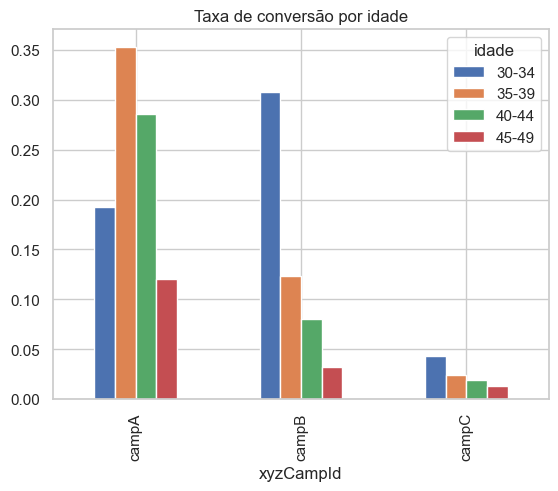

In [122]:
# Agrupamento dos dados por 'xyzCampId' e 'idade', calculando a soma das colunas
ageCampSum = df.groupby(by=['xyzCampId', 'idade']).sum()

# Cálculo da taxa de conversão como a razão entre 'ConvAp' e 'cliques' do agrupamento anterior
ageCampConv = ageCampSum['ConvAp'] / ageCampSum['cliques']

# Adição da coluna 'Taxa de conversão' ao DataFrame ageCampSum
ageCampSumCov = ageCampSum.merge(ageCampConv.rename('Taxa de conversão'), left_index=True, right_index=True)

# Criação de um gráfico de barras da 'Taxa de conversão' com a separação por idade
ageCampSumCov['Taxa de conversão'].unstack().plot(kind='bar').set_title('Taxa de conversão por idade')

Do autor:
- A Campanha A possui a maior taxa de conversão em todas as faixas etárias, exceto na faixa de 30-34 anos, enquanto a Campanha C apresenta a menor taxa de conversão.

Text(0.5, 1.0, 'CAC por Idade')

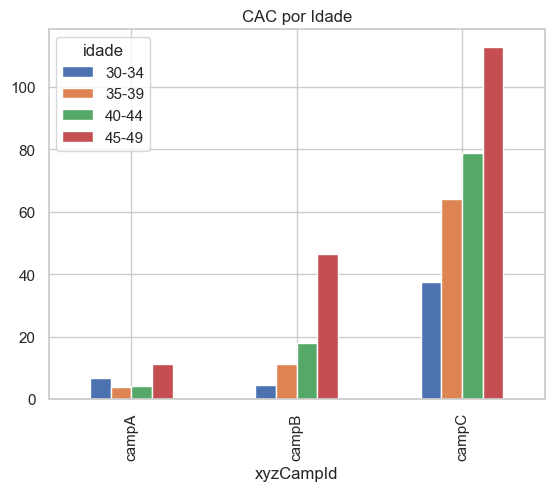

In [125]:
ageCampSum = df.groupby(by = ['xyzCampId', 'idade']).sum()
ageCampCAC = ageCampSum['gastos']/ageCampSum['ConvAp']
ageCampSumCAC = ageCampSum.merge(ageCampCAC.rename('CAC'), left_index=True, right_index=True)

ageCampSumCAC['CAC'].unstack().plot(kind='bar').set_title('CAC por Idade')

Text(0.5, 1.0, 'CAC por Idade')

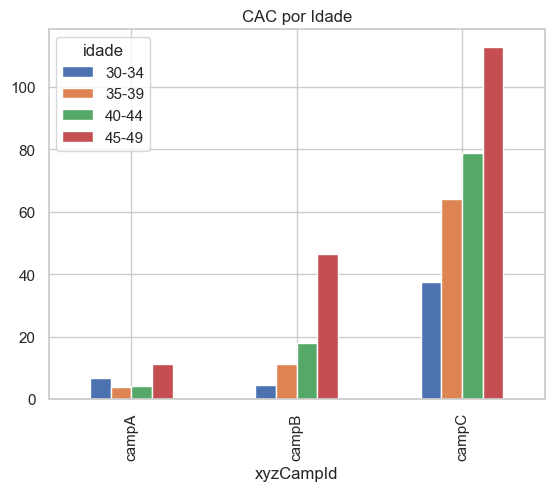

In [126]:
# Agrupamento dos dados por 'xyzCampId' e 'idade', calculando a soma das colunas
ageCampSum = df.groupby(by=['xyzCampId', 'idade']).sum()

# Cálculo do Custo de Aquisição de Clientes (CAC) como a razão entre 'gastos' e 'ConvAp' do agrupamento anterior
ageCampCAC = ageCampSum['gastos'] / ageCampSum['ConvAp']

# Adição da coluna 'CAC' ao DataFrame ageCampSum
ageCampSumCAC = ageCampSum.merge(ageCampCAC.rename('CAC'), left_index=True, right_index=True)

# Criação de um gráfico de barras do CAC com a separação por idade
ageCampSumCAC['CAC'].unstack().plot(kind='bar').set_title('CAC por Idade')

Do autor:
- Nota-se uma tendência constante de aumento do Custo de Aquisição de Clientes (CAC) com a idade em todas as campanhas, exceto na Campanha A, onde o grupo etário de 35-44 anos apresenta um CAC menor do que o grupo de 30-34 anos. Isso pode ser atribuído a um tamanho de amostra reduzido, o qual iremos analisar em seguida.

In [128]:
# Agrupamento dos dados por 'xyzCampId' e 'idade', calculando a soma das colunas
ageCampSum = df.groupby(by=['xyzCampId', 'idade']).sum()

# Impressão da soma da coluna 'impressoes' para cada grupo
print(ageCampSum['impressoes'])

# Impressão da soma da coluna 'cliques' para cada grupo
print(ageCampSum['cliques'])

xyzCampId  idade
campA      30-34      257672
           35-39       81076
           40-44       61977
           45-49       82200
campB      30-34     1655949
           35-39     1111675
           40-44     1203597
           45-49     4156966
campC      30-34    66079398
           35-39    40911893
           40-44    38338733
           45-49    59493692
Name: impressoes, dtype: int64
xyzCampId  idade
campA      30-34       57
           35-39       17
           40-44       14
           45-49       25
campB      30-34      286
           35-39      275
           40-44      311
           45-49     1112
campC      30-34     9140
           35-39     6802
           40-44     7411
           45-49    12715
Name: cliques, dtype: int64


Do autor:
- O tamanho da amostra para esta análise específica da Campanha A pode ser insuficiente para fornecer uma visão precisa.

#### Interesse

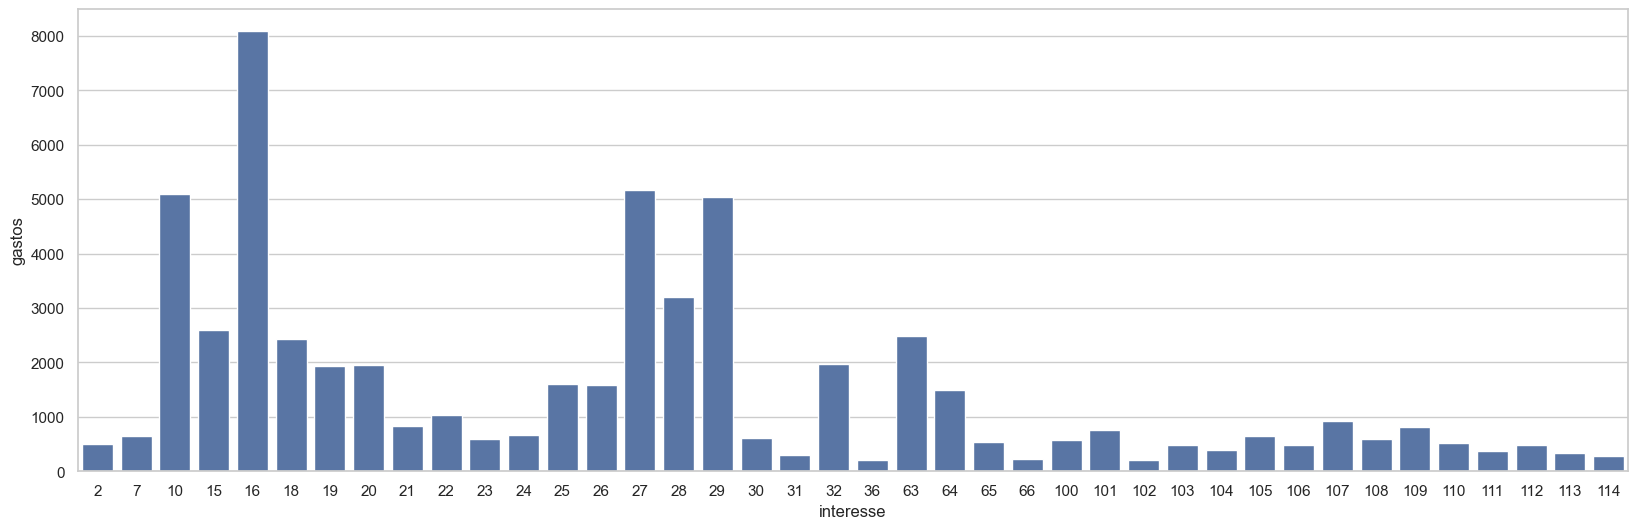

In [132]:
# Agrupamento dos dados por 'interesse', calculando a soma das colunas
interestSum = df.groupby('interesse').sum()

# Reinicialização do índice para transformar 'interesse' em uma coluna normal
interestSum.reset_index(inplace=True)

# Definição das dimensões da figura para o gráfico
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Criação de um gráfico de barras para a variável categórica 'interesse' com a soma de 'gastos'
sns.barplot(x='interesse', y='gastos', data=interestSum)

# Exibição do gráfico
plt.show()

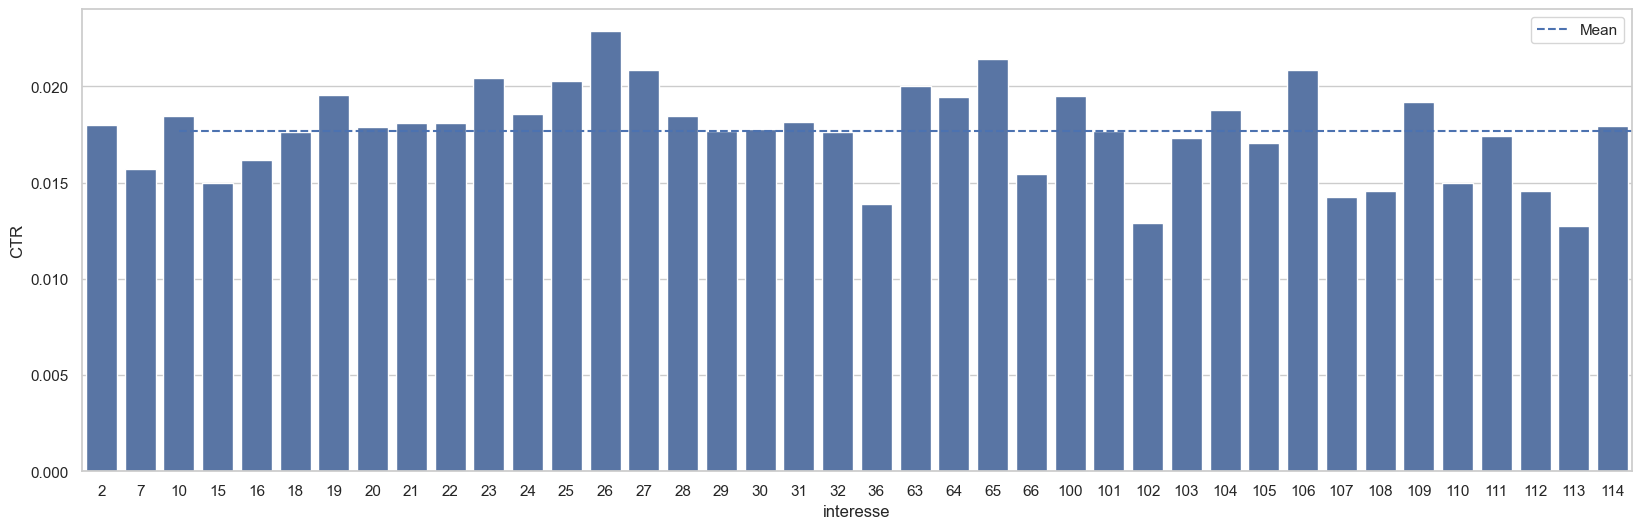

In [133]:
# Agrupamento dos dados por 'interesse', calculando a soma das colunas
interestSum = df.groupby('interesse').sum()

# Cálculo da Taxa de Clique (CTR) como a razão entre 'cliques' e 'impressoes' multiplicada por 100
interestCTR = interestSum['cliques'] / interestSum['impressoes'] * 100

# Adição da coluna 'CTR' ao DataFrame interestSum
interestSumCTR = interestSum.merge(interestCTR.rename('CTR'), left_index=True, right_index=True)

# Cálculo da média da CTR para adicionar uma linha de referência
CTRmean = [np.mean(interestSumCTR['CTR'])] * len(interestSumCTR.index)

# Definição das dimensões da figura para o gráfico
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Adição de uma linha horizontal representando a média da CTR
mean_line = ax.plot(interestSumCTR.index, CTRmean, label='Mean', linestyle='--')

# Criação de um gráfico de barras para a 'CTR' com a variável categórica 'interesse'
sns.barplot(x=interestSumCTR.index, y='CTR', data=interestSumCTR)

# Exibição do gráfico
plt.show()

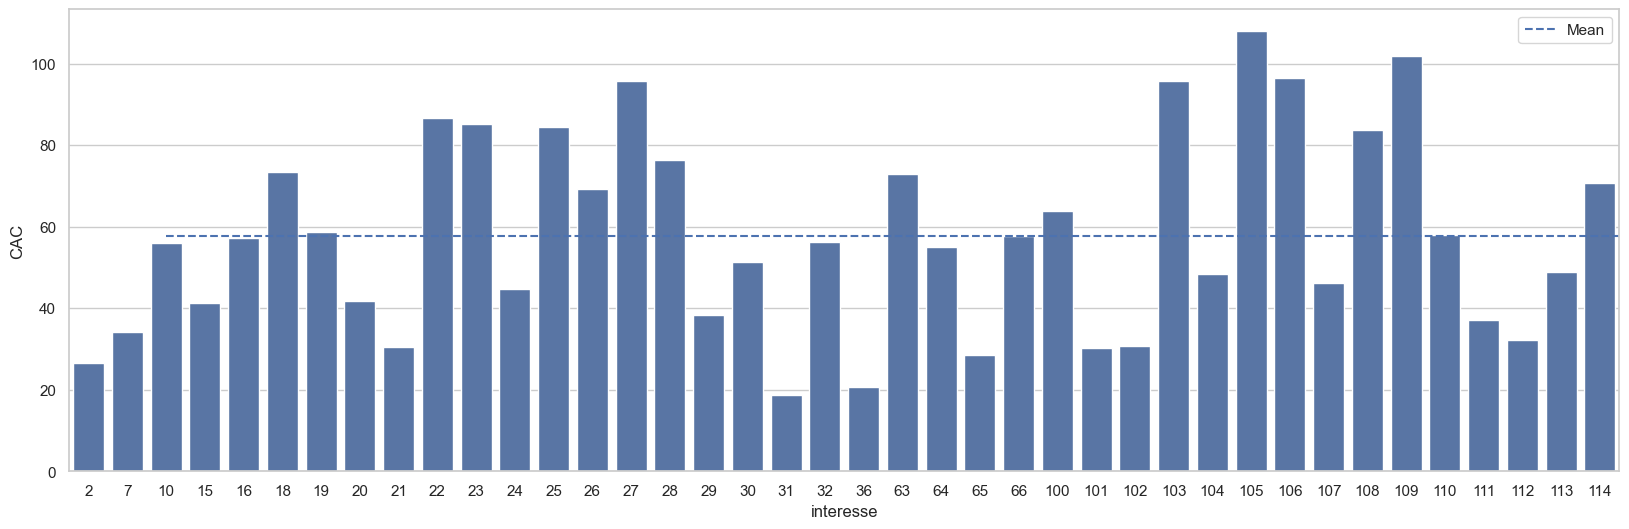

In [134]:
# Agrupamento dos dados por 'interesse', calculando a soma das colunas
interestSum = df.groupby('interesse').sum()

# Cálculo do Custo de Aquisição de Clientes (CAC) como a razão entre 'gastos' e 'ConvAp'
interestCAC = interestSum['gastos'] / interestSum['ConvAp']

# Adição da coluna 'CAC' ao DataFrame interestSum
interestSumCAC = interestSum.merge(interestCAC.rename('CAC'), left_index=True, right_index=True)

# Cálculo da média do CAC para adicionar uma linha de referência
CACmean = [np.mean(interestSumCAC['CAC'])] * len(interestSumCAC.index)

# Definição das dimensões da figura para o gráfico
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Adição de uma linha horizontal representando a média do CAC
mean_line = ax.plot(interestSumCAC.index, CACmean, label='Mean', linestyle='--')

# Criação de um gráfico de barras para o 'CAC' com a variável categórica 'interesse'
sns.barplot(x=interestSumCAC.index, y='CAC', data=interestSumCAC)

# Exibição do gráfico
plt.show()

Do autor:
- Ao analisar os gráficos, observamos que alguns interesses individuais apresentam um desempenho superior à média. Vamos examinar mais detalhadamente, selecionando os 10 interesses com o melhor desempenho com base no CAC.

In [137]:
# Ordenamento dos dados por 'CAC' em ordem crescente e remoção de colunas desnecessárias
# Seleção das 10 principais linhas com os menores valores de 'CAC'
interestKeyValues = interestSumCAC.sort_values(by='CAC', ascending=True).drop(columns=['id_anuncio', 'fbCampId', 'xyzCampId', 'idade', 'genero']).head(n=10)

# Reinicialização do índice para tornar o índice uma coluna normal
interestKeyValues.reset_index(inplace=True)

# Impressão dos 10 principais valores de 'CAC'
print(interestKeyValues)

   interesse  impressoes  cliques      gastos  Conv  ConvAp        CAC
0         31     1075312      195  299.099999    33      16  18.693750
1         36      922928      128  205.740000    28      10  20.574000
2          2     1727646      311  503.450005    40      19  26.497369
3         65     1737547      372  542.010001    33      19  28.526842
4        101     2960453      524  757.689998    71      25  30.307600
5         21     2833321      512  824.209999    70      27  30.526296
6        102     1160953      150  215.069999    14       7  30.724286
7        112     2324572      339  483.799999    53      15  32.253333
8          7     2612839      410  648.929999    59      19  34.154210
9        111     1490896      260  370.649998    30      10  37.065000


Do autor:
- Vamos investigar essas categorias de interesses mais de perto, segmentando-as por gênero.

In [139]:
# Agrupamento dos dados por 'interesse' e 'genero', calculando a soma das colunas
interestGenSum = df.groupby(by=['interesse', 'genero']).sum()

# Cálculo do Custo de Aquisição de Clientes (CAC) como a razão entre 'gastos' e 'ConvAp'
interestGenCAC = interestGenSum['gastos'] / interestGenSum['ConvAp']

# Adição da coluna 'CAC' ao DataFrame interestGenSum
interestGenSumCAC = interestGenSum.merge(interestGenCAC.rename('CAC'), left_index=True, right_index=True)

# Reinicialização do índice para tornar o índice uma coluna normal
interestGenSumCAC.reset_index(inplace=True)

# Seleção das 10 linhas com os menores valores de 'CAC'
interestGenKeyValues = interestGenSumCAC.sort_values(by='CAC', ascending=True).head(n=10)

# Remoção de colunas desnecessárias para visualização final
interestGenKeyValues = interestGenKeyValues.drop(columns=['id_anuncio', 'fbCampId', 'xyzCampId', 'Conv', 'idade'])

# Impressão dos 10 principais valores de 'CAC' por 'interesse' e 'genero'
print(interestGenKeyValues)

    interesse genero  impressoes  cliques      gastos  ConvAp        CAC
53        101      M      174381       17   25.450000       5   5.090000
57        103      M      281841       30   44.270000       3  14.756667
36         31      F      457546      113  162.110000      10  16.211000
41         36      M      810196      105  175.479999      10  17.548000
77        113      M      599120       45   66.520000       3  22.173333
37         31      M      617766       82  136.989999       6  22.831666
47         65      M     1016769      197  297.440001      13  22.880000
73        111      M      170763       18   25.610000       1  25.610000
55        102      M      312803       36   52.140000       2  26.070000
71        110      M      920827      113  158.870000       6  26.478333


Do autor:
- Ao analisar os dados acima, podemos observar que os homens com o interesse 101 apresentam um CAC significativamente menor do que qualquer outro interesse. Isso pode ser um acaso, dado o pequeno tamanho da amostra de cliques. Outra observação interessante é que o interesse 31 é eficaz tanto para homens quanto para mulheres. Vamos examinar o CAC para mulheres com mais detalhes.

In [143]:
# Agrupa os dados por 'interesse' e 'genero', calculando a soma das colunas
interestGenSum = df.groupby(by=['interesse', 'genero']).sum()

# Cálculo do Custo de Aquisição de Clientes (CAC) como a razão entre 'gastos' e 'ConvAp'
interestGenCAC = interestGenSum['gastos'] / interestGenSum['ConvAp']

# Adição da coluna 'CAC' ao DataFrame interestGenSum
interestGenSumCAC = interestGenSum.merge(interestGenCAC.rename('CAC'), left_index=True, right_index=True)

# Reinicialização do índice para tornar o índice uma coluna normal
interestGenSumCAC.reset_index(inplace=True)

# Filtragem para manter apenas os dados do gênero feminino
interestFSumCAC = interestGenSumCAC[interestGenSumCAC.genero != 'M']

# Remoção de colunas desnecessárias e ordenação dos dados pelo 'CAC'
interestFKeyValues = interestFSumCAC.drop(columns=['id_anuncio', 'fbCampId', 'Conv', 'xyzCampId', 'idade'])
interestFKeyValues = interestFKeyValues.sort_values(by='CAC', ascending=True).head(n=10)

# Impressão dos 10 principais valores de 'CAC' para o gênero feminino
print(interestFKeyValues)

    interesse genero  impressoes  cliques      gastos  ConvAp        CAC
36         31      F      457546      113  162.110000      10  16.211000
0           2      F      348242       72  106.230000       4  26.557500
74        112      F     1918436      297  422.449999      14  30.175000
16         21      F     1472470      310  474.969999      15  31.664667
54        102      F      848150      114  162.929999       5  32.586000
48         66      F      107689       23   34.770000       1  34.770000
38         32      F     1941111      347  538.840002      15  35.922667
52        101      F     2786072      507  732.239997      20  36.612000
72        111      F     1320133      242  345.039998       9  38.337778
46         65      F      720778      175  244.570000       6  40.761667


Do autor:
- Observamos que o interesse 31 é um pouco fora do padrão, apresentando um CAC $10 menor do que qualquer outro.

#### Idade e interesse


In [147]:
# Agrupamento dos dados por 'interesse' e 'idade', calculando a soma das colunas
interestAgeSum = df.groupby(by=['interesse', 'idade']).sum()

# Cálculo do Custo de Aquisição de Clientes (CAC) como a razão entre 'gastos' e 'ConvAp'
interestAgeCAC = interestAgeSum['gastos'] / interestAgeSum['ConvAp']

# Adição da coluna 'CAC' ao DataFrame interestAgeSum
interestAgeSumCAC = interestAgeSum.merge(interestAgeCAC.rename('CAC'), left_index=True, right_index=True)

# Ordenação dos dados pelo 'CAC' em ordem crescente
interestAgeKeyValues = interestAgeSumCAC.sort_values(by='CAC', ascending=True)

# Filtragem para excluir linhas onde 'cliques' é menor ou igual a 10
interestAgeKeyValues = interestAgeKeyValues[~(interestAgeKeyValues['cliques'] <= 10)]

# Remoção de colunas desnecessárias para visualização final
interestAgeKeyValues = interestAgeKeyValues.drop(columns=['id_anuncio', 'fbCampId', 'Conv', 'xyzCampId', 'genero'])

# Reinicialização do índice para tornar o índice uma coluna normal
interestAgeKeyValues.reset_index(inplace=True)

# Impressão das 20 primeiras linhas do DataFrame filtrado e ordenado
print(interestAgeKeyValues.head(n=20))

    interesse  idade  impressoes  cliques       gastos  ConvAp        CAC
0         102  30-34      154195       11    14.120000       3   4.706667
1          31  30-34      259505       24    38.250000       8   4.781250
2         103  35-39       92080       12    16.940000       2   8.470000
3          36  35-39       92470       12    20.020000       2  10.010000
4          18  40-44       72875       16    23.880000       2  11.940000
5          65  35-39      306311       67   100.370001       7  14.338572
6          36  30-34      474378       53    86.549999       6  14.425000
7          21  30-34     1207627      164   281.960000      19  14.840000
8         101  30-34      596534       86   121.210003       8  15.151250
9         110  30-34      410008       44    61.150000       4  15.287500
10          2  30-34      687634      105   171.730001      11  15.611818
11         16  30-34     6199021      684  1098.269995      60  18.304500
12         10  30-34     3738627      

Do autor:
- Tanto o interesse 102 quanto o 31 apresentam um CAC muito mais baixo e valeria a pena investir para verificar se esse CAC é sustentável com uma exposição maior.

### Conclusões

**Campanhas**

- **Campanha C** teve o maior número de anúncios individuais, impressões, gasto com anúncios e conversões aprovadas totais.
- **Campanha B** teve a maior Taxa de Cliques (CTR), ligeiramente superior à Campanha A, enquanto era mais de 25% maior que a Campanha C.
- **Campanha A** apresentou a maior taxa de conversão, superando a Campanha B por 2 vezes e a Campanha C por 10 vezes.
- **Campanha A** também teve o menor Custo de Aquisição de Clientes (CAC), quase 10 vezes menor que a Campanha C e 3 vezes menor que a Campanha B.
- **Campanha A** teve o menor Custo por Clique (CPC).

**Gênero**

- As mulheres tiveram 54% de todas as impressões, enquanto os homens tiveram 46%.
- As mulheres apresentaram uma CTR mais alta que os homens por cerca de 20%, enquanto os homens quase dobraram a taxa de conversão das mulheres.
- O custo de aquisição de clientes feminino foi cerca de $30 mais alto do que o masculino.
- Tanto as impressões quanto a CTR em campanhas são semelhantes aos equivalentes não segmentados por campanha.
- As taxas de conversão e o CAC são semelhantes para as Campanhas A e C; no entanto, para a Campanha B, as taxas de conversão masculinas são 5 vezes maiores do que as femininas em comparação com os equivalentes não segmentados por campanha.

**Interesses**

- Os interesses 31 e 36 têm um CAC extremamente baixo em comparação com outros.
- Os interesses 101, 104 e 112 têm o maior impacto nas conversões totais, embora o gasto nessas categorias de interesse seja muito menor do que em outras.
- Os interesses 31 e 102, combinados com a faixa etária de 30-34, têm um CAC de aproximadamente 4,75, quase metade do próximo segmento de interesse e faixa etária mais baixo.
- O interesse 101 tem o menor CAC ao direcionar os homens, com aproximadamente 5,10, quase 1/3 do próximo CAC mais alto para o segmento de interesse e gênero.

### Insights de Negócios

**Otimização do Público-Alvo**

- Faixa Etária: Focar na faixa etária de 30-34 anos, pois apresentou a maior taxa de conversão e um CAC mais baixo do que outros segmentos.
- Gênero: Priorizar o público masculino, que demonstrou uma taxa de conversão superior e um CAC mais baixo em comparação com outros segmentos.
- Interesses: Entre os quatro maiores gastos com interesses, dois se mostraram ineficientes devido a um CAC superior à média (interesses 10 e 27). (Observação: Isso depende de LFV (Lifetime Value) semelhante entre os segmentos de clientes.)

**Otimização das Campanhas**

- A maior parte do orçamento está sendo alocada para a campanha de pior desempenho.
- A Campanha A é a melhor em termos de CAC entre todas as faixas etárias e gêneros.

**Aumentar Gradualmente o Investimento na Campanha**

- Devido ao tamanho pequeno da amostra em comparação com outras campanhas, os resultados podem ser aleatórios. Aumentar o investimento ajudará a verificar se os resultados são consistentes.

**Revisar o Investimento em Categorias de Interesse**

- Aumentar o gasto com categorias de interesse de alto desempenho e reduzir o gasto com categorias de baixo desempenho.

**Ajustar o Foco do Marketing**

- Redirecionar o orçamento de marketing para atingir um público mais jovem.